# Validation results for 100m synthetic pixel, with Energy balance correction

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import datetime
import matplotlib
font = {'family' : 'sans serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
from tqdm import tqdm
%run ..\Functions.ipynb

# Collocated dekadal data

In [22]:
obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
stations_csv = r"..\0_insitu\FLUXNET2022.xlsx"
df_stations = pd.read_excel(stations_csv, index_col=0)
df_stations

,Site,Period,Dataset,x,y,IGBP_site,Climate_site,Climate_KG0p01,Climate_l1,Crop type,Irrigation
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300,WET,0,ET,E,NaN,NaN
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700,DBF,Dfb,Dfb,D,NaN,NaN
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000,WET,0,Csb,C,NaN,NaN
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300,WET,Csb,Csb,C,NaN,NaN
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500,CRO,Dfb,Dfb,D,Corn,NaN
...,...,...,...,...,...,...,...,...,...,...,...
220,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333,GRA,NaN,Dfb,D,NaN,NaN
221,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566,ENF,Dfb,Dfc,D,NaN,NaN
222,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990,ENF,Dfb,Dfb,D,NaN,NaN
223,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500,ENF,NaN,Dfb,D,NaN,NaN


Steps
- create a dataframe
- Read csv data 
- Filter empty rows 
- Calculate metrics for each stations

# concatenate all sites

In [23]:
row = df_stations.iloc[0]
site = row['Site']
obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)

#remove masked error
start = "2018-01-01"
df = df.loc[start::]
df = df[df['mask']==0]
df.loc[:,'Site']=site
df = df.reset_index() 
df

,Date,AaIi,AaIii,AbIi,AbIii,AaIIi,AbIIi,WaPORv3L1,mask,PMLv2,MODIS,SSEBop,WaPORv3L1-100m,Site
0,2018-01-01,1.815152,1.797770,NaN,NaN,1.800842,NaN,1.6,0,1.981250,1.683906,2.6,1.70,AR-TF1
1,2018-01-11,1.578355,1.562931,NaN,NaN,1.060065,NaN,1.7,0,1.751500,1.633906,2.4,1.80,AR-TF1
2,2018-01-21,1.443526,1.427905,NaN,NaN,0.473640,NaN,1.8,0,1.748636,2.070312,1.7,1.85,AR-TF1
3,2018-02-01,1.792598,1.775629,NaN,NaN,1.762503,NaN,1.5,0,1.679750,1.860469,2.3,1.55,AR-TF1
4,2018-02-11,1.398662,1.384739,NaN,NaN,1.387317,NaN,1.5,0,1.575875,1.427969,2.1,1.50,AR-TF1
5,2018-02-21,1.722765,1.709135,NaN,NaN,1.712505,NaN,2.2,0,1.510312,1.526172,0.8,2.20,AR-TF1
6,2018-03-01,1.244057,1.229870,NaN,NaN,1.232782,NaN,1.7,0,1.343125,1.507031,1.5,1.70,AR-TF1
7,2018-03-11,0.602896,0.595220,NaN,NaN,0.596351,NaN,0.8,0,1.019000,0.977187,1.7,0.80,AR-TF1
8,2018-03-21,1.229332,1.215311,NaN,NaN,1.217095,NaN,1.2,0,0.920795,0.890909,1.6,1.20,AR-TF1
9,2018-04-01,0.348912,0.343611,NaN,NaN,0.344250,NaN,0.6,0,0.582875,0.668125,0.9,0.60,AR-TF1


In [24]:
for i,row in df_stations.iterrows():
    site = row['Site']
    obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
    try:
        obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
        df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)
        start = "2018-01-01"
        df = df.loc[start::]
        if 'mask' in df.columns:
            df = df[df['mask']==0]
        df.loc[:,'Site']=site
        df = df.reset_index() 
        
        if i== 0:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0, ignore_index=True)
    except:
        print(f'Error: {obs_fh}')
    

Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\US-Wi0.csv
Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\AU-Adr.csv


In [25]:
df_all

,Date,AaIi,AaIii,AbIi,AbIii,AaIIi,AbIIi,WaPORv3L1,mask,PMLv2,MODIS,SSEBop,WaPORv3L1-100m,Site
0,2018-01-01,1.815152,1.797770,NaN,NaN,1.800842,NaN,1.6,0.0,1.981250,1.683906,2.6,1.70,AR-TF1
1,2018-01-11,1.578355,1.562931,NaN,NaN,1.060065,NaN,1.7,0.0,1.751500,1.633906,2.4,1.80,AR-TF1
2,2018-01-21,1.443526,1.427905,NaN,NaN,0.473640,NaN,1.8,0.0,1.748636,2.070312,1.7,1.85,AR-TF1
3,2018-02-01,1.792598,1.775629,NaN,NaN,1.762503,NaN,1.5,0.0,1.679750,1.860469,2.3,1.55,AR-TF1
4,2018-02-11,1.398662,1.384739,NaN,NaN,1.387317,NaN,1.5,0.0,1.575875,1.427969,2.1,1.50,AR-TF1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24029,2020-11-11,0.059801,0.058511,0.030909,0.030237,0.058503,0.010290,0.0,NaN,0.067500,0.089063,0.0,0.00,SE-Svb
24030,2020-11-21,0.011606,0.011352,0.008057,0.007880,0.011358,-0.000349,0.0,NaN,0.018500,0.050469,0.0,0.00,SE-Svb
24031,2020-12-01,0.004458,0.004366,0.002268,0.002221,0.004365,-0.000416,0.0,NaN,0.000250,0.071406,0.0,0.00,SE-Svb
24032,2020-12-11,0.004024,0.003919,0.001565,0.001527,0.003909,-0.000264,0.0,NaN,0.000000,0.080000,0.0,0.00,SE-Svb


In [26]:
len(df_all['Site'].unique())

222

<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_4304\1935938967.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('EC-ET $\mathrm{(mm d^{-1})}$')
C:\Users\ntr002\AppData\Local\Temp\ipykernel_4304\1935938967.py:62: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('WaPORv3L1-ET $\mathrm{(mm d^{-1})}$')


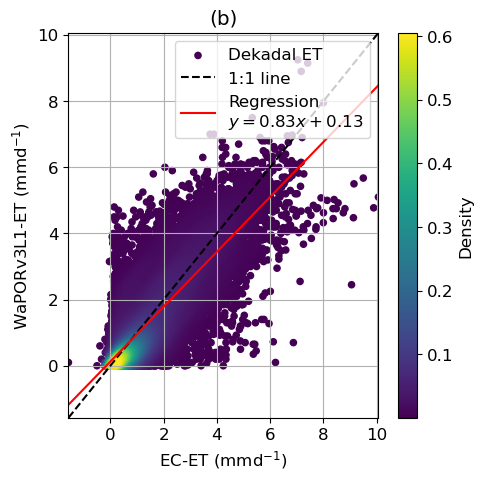

In [27]:
# data
df_val = df_all[['AbIi','WaPORv3L1-100m']]
df_val = df_val.dropna()
# your data
x = df_val['AbIi'].values
y = df_val['WaPORv3L1-100m'].values

# calculate point density
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)  # density values for each point

# sort the points by density, so that high density points are plotted on top
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# prepare figure
fig, ax = plt.subplots(figsize=(5, 5))

# density scatter plot
scatter = ax.scatter(x, y, c=z, s=20, cmap='viridis', label='Dekadal ET')

# colorbar for density
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density')

# 1:1 line
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
ax.plot(lims, lims, 'k--', label='1:1 line')

# regression
coef = np.polyfit(x, y, 1)
reg = np.poly1d(coef)
y_pred = reg(x)

# calculate confidence interval
n = len(x)
mean_x = np.mean(x)
t_val = stats.t.ppf(0.95, df=n-2)
s_err = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
conf = t_val * s_err * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))

# sort for plotting regression and CI
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_sorted = y_pred[sorted_idx]
conf_sorted = conf[sorted_idx]

# regression line
ax.plot(lims, reg(lims), 'r-', label=f'Regression\n$y={coef[0]:.2f}x+{coef[1]:.2f}$')

# confidence interval
# ax.fill_between(x_sorted, y_sorted - conf_sorted, y_sorted + conf_sorted, 
#                 color='r', alpha=0.2, label='99% Confidence Interval')

# equal axis limits
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.text(0.025,0.9,'(b)',fontsize=14,transform=ax.transAxes)
ax.set_title('(b)')
# labels, grid, legend
ax.set_xlabel('EC-ET $\mathrm{(mm d^{-1})}$')
ax.set_ylabel('WaPORv3L1-ET $\mathrm{(mm d^{-1})}$')
ax.grid(True)
ax.legend(loc='upper right')
plt.savefig('Figure/E-4b.png',bbox_inches = 'tight')
plt.show()


In [28]:
observation = 'AbIi' #unclosed, daily
product= 'WaPORv3L1-100m'
metrics=calc_metrics(df_val[product], df_val[observation])
metrics

{'r2': np.float64(0.6735513181490089),
 'nse': np.float64(0.6361311116594957),
 'bias': np.float64(-0.1403164761869809),
 'rmse': np.float64(0.88899797991334),
 'r': np.float64(0.6735513181490089),
 'urmse': np.float64(0.8778545977554981)}

In [29]:
np.sqrt(metrics['r2'])

np.float64(0.8207017230084319)

In [30]:
metrics['bias']*100/np.mean(df_all['AaIi'])

np.float64(-10.584910119092239)

# calculate metrics per sites

In [31]:
data = {
'Site': [],
'N': [],
'EC average': [],
'EC std': [],
'v3L1 average': [],
'v3L1 std': [], 
'r2': [],
'r':[],
'nse': [],
'bias': [],
'rmse': [],
    'urmse': [],
}
observation = 'AbIi'
product= 'WaPORv3L1-100m'
for site in df_all['Site'].unique():
    # print(site)
    df = df_all.loc[df_all['Site'] == site]
    data['Site'].append(site)
    data['N'].append(len(df))
    data['EC average'].append(df[observation].mean())
    data['EC std'].append(df[observation].std())
    data['v3L1 average'].append(df[product].mean())
    data['v3L1 std'].append(df[product].std())
    metrics=calc_metrics(df[product], df[observation])
    for metric in list(metrics.keys()):
        data[f'{metric}'].append(metrics[metric]) 

In [32]:
df_all['Site'].unique()

array(['AR-TF1', 'CA-Cbo', 'CA-DB2', 'CA-DBB', 'CA-ER1', 'CA-LP1',
       'PE-QFR', 'US-ALQ', 'US-ARM', 'US-Bar', 'US-Bi1', 'US-Bi2',
       'US-BRG', 'US-BZB', 'US-BZF', 'US-BZo', 'US-BZS', 'US-CF1',
       'US-CF2', 'US-CF3', 'US-CF4', 'US-CS1', 'US-CS2', 'US-CS3',
       'US-CS4', 'US-DFC', 'US-DS3', 'US-EDN', 'US-EML', 'US-GLE',
       'US-Ha1', 'US-HB1', 'US-HB2', 'US-HB3', 'US-Hn2', 'US-Hn3',
       'US-Ho2', 'US-HWB', 'US-ICh', 'US-ICs', 'US-ICt', 'US-Jo1',
       'US-Jo2', 'US-KFS', 'US-KLS', 'US-Kon', 'US-KS3', 'US-Me2',
       'US-Me6', 'US-MMS', 'US-Mo1', 'US-Mo2', 'US-Mo3', 'US-MOz',
       'US-Mpj', 'US-Myb', 'US-NC3', 'US-NC4', 'US-Ne1', 'US-NGB',
       'US-NGC', 'US-ONA', 'US-Pnp', 'US-RGA', 'US-RGB', 'US-RGo',
       'US-Rls', 'US-Rms', 'US-Ro4', 'US-Ro5', 'US-Ro6', 'US-Rpf',
       'US-Rwf', 'US-Rws', 'US-Seg', 'US-Ses', 'US-Sne', 'US-Snf',
       'US-SRG', 'US-SRS', 'US-Syv', 'US-Ton', 'US-Tw1', 'US-Tw3',
       'US-Tw4', 'US-Tw5', 'US-UMB', 'US-UMd', 'US-Var', 'US-V

In [33]:
len(df_all['Site'].unique())

222

In [34]:
df_data=pd.DataFrame(data)
df_data

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,r,nse,bias,rmse,urmse
0,AR-TF1,12,NaN,NaN,1.308333,0.616011,NaN,NaN,1.000000,NaN,NaN,NaN
1,CA-Cbo,108,1.839809,1.800662,1.449074,1.704159,0.888082,0.888082,0.821968,-0.390735,0.715713,0.599643
2,CA-DB2,39,1.330572,0.664093,1.119231,1.163401,NaN,NaN,0.775911,0.150463,0.630423,0.711124
3,CA-DBB,108,1.355656,0.995339,1.123611,1.093021,NaN,NaN,0.863384,-0.159121,0.415825,0.391036
4,CA-ER1,108,NaN,NaN,0.923148,1.130946,NaN,NaN,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,SE-Deg,108,0.929905,1.263459,0.721296,1.036984,0.849083,0.849083,0.720063,-0.208608,0.546113,0.504700
218,SE-Htm,108,1.229281,1.164093,1.166204,1.305485,0.632407,0.632407,0.620747,-0.063077,0.800233,0.797743
219,SE-Nor,108,1.297014,1.171988,1.141667,1.333159,0.781553,0.781553,0.767823,-0.155347,0.639398,0.620240
220,SE-Ros,108,0.709765,0.815766,0.806713,1.114715,0.870086,0.870086,0.822063,0.096948,0.468033,0.457882


In [35]:
# calculate PBIAS
df_data['pbias']=df_data['bias']*100/df_data['EC average']
df_data['rrmse']=df_data['rmse']*100/df_data['EC average']

In [36]:
df_data

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,r,nse,bias,rmse,urmse,pbias,rrmse
0,AR-TF1,12,NaN,NaN,1.308333,0.616011,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
1,CA-Cbo,108,1.839809,1.800662,1.449074,1.704159,0.888082,0.888082,0.821968,-0.390735,0.715713,0.599643,-21.237795,38.901507
2,CA-DB2,39,1.330572,0.664093,1.119231,1.163401,NaN,NaN,0.775911,0.150463,0.630423,0.711124,11.308131,47.379896
3,CA-DBB,108,1.355656,0.995339,1.123611,1.093021,NaN,NaN,0.863384,-0.159121,0.415825,0.391036,-11.737564,30.673354
4,CA-ER1,108,NaN,NaN,0.923148,1.130946,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,SE-Deg,108,0.929905,1.263459,0.721296,1.036984,0.849083,0.849083,0.720063,-0.208608,0.546113,0.504700,-22.433308,58.727863
218,SE-Htm,108,1.229281,1.164093,1.166204,1.305485,0.632407,0.632407,0.620747,-0.063077,0.800233,0.797743,-5.131202,65.097641
219,SE-Nor,108,1.297014,1.171988,1.141667,1.333159,0.781553,0.781553,0.767823,-0.155347,0.639398,0.620240,-11.977281,49.297709
220,SE-Ros,108,0.709765,0.815766,0.806713,1.114715,0.870086,0.870086,0.822063,0.096948,0.468033,0.457882,13.659201,65.941990


In [37]:
df_data.to_csv(r'Data\222sites_metrics_WaPOR_100m_LE_CORR.csv')

# Plot by land cover and climate

In [38]:
stations_xlsx = r"..\0_insitu\FLUXNET2022.xlsx"
df_meta = pd.read_excel(stations_xlsx, index_col=0)
df_meta

,Site,Period,Dataset,x,y,IGBP_site,Climate_site,Climate_KG0p01,Climate_l1,Crop type,Irrigation
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300,WET,0,ET,E,NaN,NaN
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700,DBF,Dfb,Dfb,D,NaN,NaN
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000,WET,0,Csb,C,NaN,NaN
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300,WET,Csb,Csb,C,NaN,NaN
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500,CRO,Dfb,Dfb,D,Corn,NaN
...,...,...,...,...,...,...,...,...,...,...,...
220,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333,GRA,NaN,Dfb,D,NaN,NaN
221,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566,ENF,Dfb,Dfc,D,NaN,NaN
222,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990,ENF,Dfb,Dfb,D,NaN,NaN
223,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500,ENF,NaN,Dfb,D,NaN,NaN


In [39]:
site_to_igbp = df_meta.groupby('Site')['IGBP_site'].first()

# now you can safely map
df_data['IGBP'] = (
    df_data['Site']
      .map(site_to_igbp)
      .fillna('')
)
df_data

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,r,nse,bias,rmse,urmse,pbias,rrmse,IGBP
0,AR-TF1,12,NaN,NaN,1.308333,0.616011,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,WET
1,CA-Cbo,108,1.839809,1.800662,1.449074,1.704159,0.888082,0.888082,0.821968,-0.390735,0.715713,0.599643,-21.237795,38.901507,DBF
2,CA-DB2,39,1.330572,0.664093,1.119231,1.163401,NaN,NaN,0.775911,0.150463,0.630423,0.711124,11.308131,47.379896,WET
3,CA-DBB,108,1.355656,0.995339,1.123611,1.093021,NaN,NaN,0.863384,-0.159121,0.415825,0.391036,-11.737564,30.673354,WET
4,CA-ER1,108,NaN,NaN,0.923148,1.130946,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,CRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,SE-Deg,108,0.929905,1.263459,0.721296,1.036984,0.849083,0.849083,0.720063,-0.208608,0.546113,0.504700,-22.433308,58.727863,GRA
218,SE-Htm,108,1.229281,1.164093,1.166204,1.305485,0.632407,0.632407,0.620747,-0.063077,0.800233,0.797743,-5.131202,65.097641,ENF
219,SE-Nor,108,1.297014,1.171988,1.141667,1.333159,0.781553,0.781553,0.767823,-0.155347,0.639398,0.620240,-11.977281,49.297709,ENF
220,SE-Ros,108,0.709765,0.815766,0.806713,1.114715,0.870086,0.870086,0.822063,0.096948,0.468033,0.457882,13.659201,65.941990,ENF


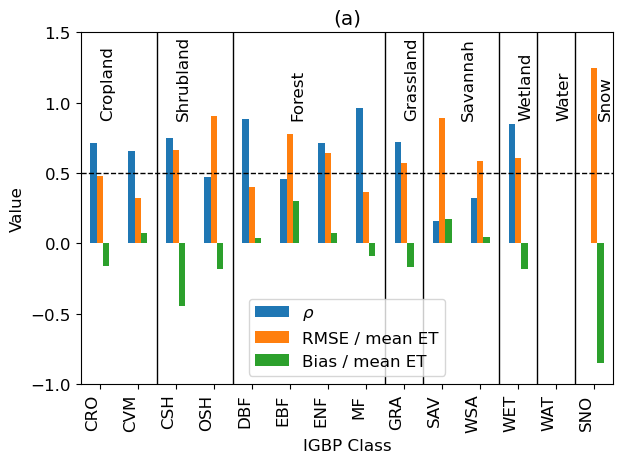

In [44]:
grouped = df_data.groupby('IGBP')[['r', 'rrmse', 'pbias']].mean().reset_index().iloc[1:]
# grouped['r'] = np.sqrt(grouped['r2'])
grouped['rmse/mean ET'] = grouped['rrmse']/100 
grouped['bias/mean ET'] = grouped['pbias']/100
grouped=grouped.set_index('IGBP')
lst = ["CRO", "CVM", "CSH", "OSH", "DBF", "EBF", "ENF", "MF", "GRA", "SAV", "WSA", "WET", "WAT", "SNO"] #ordered
grouped = grouped.loc[lst]
# Prepare for plotting: set IGBP as index and select only desired columns
plot_df = grouped[['r','rmse/mean ET', 'bias/mean ET']]
plot_df = plot_df.rename(columns = {'r': r'$\rho$', 'rmse/mean ET': 'RMSE / mean ET', 'bias/mean ET': 'Bias / mean ET'})
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('IGBP Class')
ax.set_ylabel('Value')
ax.set_title('(a)')
ax.legend(loc='lower center') 
# customize ticklabels
for lbl in ax.get_xticklabels():
    lbl.set_rotation(90)
    lbl.set_ha('right')   # align rotated labels
# add area
ax.axvline(x=1.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=3.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=7.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=8.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=10.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=11.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=12.5, color='black', linestyle='-', linewidth=1)
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
# annotation
ax.annotate('Cropland', (0,0.9),rotation=90)
ax.annotate('Shrubland',(2,0.9),rotation=90)
ax.annotate('Forest',(5,0.9),rotation=90)
ax.annotate('Grassland',(8,0.9),rotation=90)
ax.annotate('Savannah',(9.5,0.9),rotation=90)
ax.annotate('Wetland',(11,0.9),rotation=90)
ax.annotate('Water',(12,0.9),rotation=90)
ax.annotate('Snow',(13.1,0.9),rotation=90)
ax.set_ylim([-1,1.5])
plt.tight_layout()
plt.savefig('Figure/E-5a.png',bbox_inches = 'tight')
plt.show()

In [45]:
site_to_clim = df_meta.groupby('Site')['Climate_KG0p01'].first()

# now you can safely map
df_data['Climate'] = (
    df_data['Site']
      .map(site_to_clim)
      .fillna('')
)
df_data

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,r,nse,bias,rmse,urmse,pbias,rrmse,IGBP,Climate
0,AR-TF1,12,NaN,NaN,1.308333,0.616011,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,WET,ET
1,CA-Cbo,108,1.839809,1.800662,1.449074,1.704159,0.888082,0.888082,0.821968,-0.390735,0.715713,0.599643,-21.237795,38.901507,DBF,Dfb
2,CA-DB2,39,1.330572,0.664093,1.119231,1.163401,NaN,NaN,0.775911,0.150463,0.630423,0.711124,11.308131,47.379896,WET,Csb
3,CA-DBB,108,1.355656,0.995339,1.123611,1.093021,NaN,NaN,0.863384,-0.159121,0.415825,0.391036,-11.737564,30.673354,WET,Csb
4,CA-ER1,108,NaN,NaN,0.923148,1.130946,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,CRO,Dfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,SE-Deg,108,0.929905,1.263459,0.721296,1.036984,0.849083,0.849083,0.720063,-0.208608,0.546113,0.504700,-22.433308,58.727863,GRA,Dfb
218,SE-Htm,108,1.229281,1.164093,1.166204,1.305485,0.632407,0.632407,0.620747,-0.063077,0.800233,0.797743,-5.131202,65.097641,ENF,Dfc
219,SE-Nor,108,1.297014,1.171988,1.141667,1.333159,0.781553,0.781553,0.767823,-0.155347,0.639398,0.620240,-11.977281,49.297709,ENF,Dfb
220,SE-Ros,108,0.709765,0.815766,0.806713,1.114715,0.870086,0.870086,0.822063,0.096948,0.468033,0.457882,13.659201,65.941990,ENF,Dfb


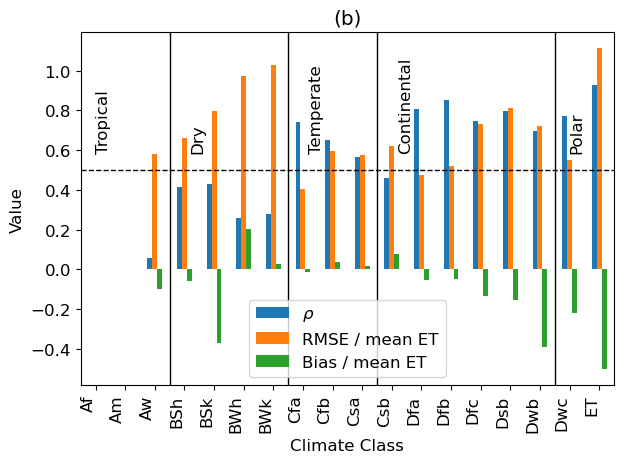

In [55]:
grouped = df_data.groupby('Climate')[['r', 'rrmse', 'pbias','EC average']].mean().reset_index().iloc[1:]
# grouped['r'] = np.sqrt(grouped['r2'])
grouped['rmse/mean ET'] = grouped['rrmse']/100
grouped['bias/mean ET'] = grouped['pbias']/100
# Prepare for plotting: set IGBP as index and select only desired columns
plot_df = grouped.set_index('Climate')[['r','rmse/mean ET', 'bias/mean ET']]
plot_df = plot_df.rename(columns = {'r': r'$\rho$', 'rmse/mean ET': 'RMSE / mean ET', 'bias/mean ET': 'Bias / mean ET'})
# Plot bar chart
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('Climate Class')
ax.set_ylabel('Value')
ax.set_title('(b)')
ax.legend(loc='lower center') 
# customize ticklabels
for lbl in ax.get_xticklabels():
    lbl.set_rotation(90)
    lbl.set_ha('right')   # align rotated labels
# add area
ax.axvline(x=2.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=9.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=15.5, color='black', linestyle='-', linewidth=1)
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
# annotation
ax.annotate('Tropical', (0,0.6),rotation=90)
ax.annotate('Dry',(3.2,0.6),rotation=90)
ax.annotate('Temperate',(7.2,0.6),rotation=90)
ax.annotate('Continental',(10.2,0.6),rotation=90)
ax.annotate('Polar',(16,0.6),rotation=90)
plt.tight_layout()
plt.savefig('Figure/E-5b.png',bbox_inches = 'tight')
plt.show()

# Taylor diagram

In [56]:
#Source: https://colab.research.google.com/drive/19WJ8L2NlWA7xrDhieHE1Zvi90hyZAjcR
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):    
    def __init__(self, STD ,fig=None, rect=111, label='_',f_std=1.5):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs) # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs) # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = f_std * self.STD
        gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Normalized standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Normalized standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Useless
        ax.axis['bottom'].set_visible(False)
        # Contours along standard deviations
        ax.grid()
        self._ax = ax # Graphical axes
        self.ax = ax.get_aux_axes(tr) # Polar coordinates
        # Add reference point and STD contour
        l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=8, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]
    def add_sample(self,STD,r,*args,**kwargs):
        l,= self.ax.plot(np.arccos(r), STD,*args, **kwargs) # (theta, radius)
        self.samplePoints.append(l)
        return l
    def add_contours(self,levels=5,text_label='$RMSE_c$',**kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        # !! CALCULATE centered RMSE
        RMSEc=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSEc, levels, **kwargs)
        
        return contours
# choose your color once
point_color = 'C0'    # the default “cycle” blue
transparency = 0.4    # 0.0 fully transparent → 1.0 fully opaque
def srl(obsSTD, s, r, l, ftitle='Taylor diagram', fsize=(10,10),fname=None):
    fig=plt.figure(figsize=fsize)
    std_extend = np.max(s)/obsSTD + 0.5
    dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='Observed',f_std=std_extend)
    plt.clabel(dia.add_contours(colors='0.5'), inline=1, fontsize=10)
    cs = plt.matplotlib.cm.Set1(np.linspace(0, 1, len(l))) #random color
    srlc = zip(s, r, l, cs)
    for i in srlc: # add point
        dia.add_sample(i[0], i[1], label=i[2], 
                       # c=i[3], #color
                       marker='o',
                   c=point_color,
                   alpha=transparency)
    spl = [p.get_label() for p in dia.samplePoints]
    # fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), 
    #            loc=[0.8,0.8])
    plt.title(ftitle)
    if fname != None:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    plt.close(fig)

C:\Users\ntr002\AppData\Local\Temp\ipykernel_4304\3600243313.py:9: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\ntr002\AppData\Local\Temp\ipykernel_4304\3600243313.py:72: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='0.5'), inline=1, fontsize=10)


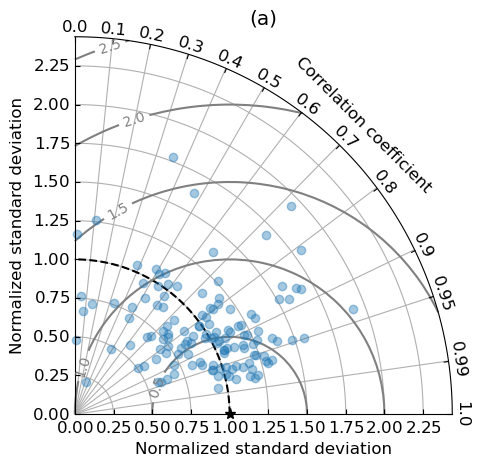

<Figure size 640x480 with 0 Axes>

In [58]:
df_plot = df_data.copy()
df_plot = df_plot.dropna()
obsSTD = 1
l = list(df_plot['Site'])
# Standard deviation of each predicted data
s = list(df_plot['v3L1 std']/df_plot['EC std'])
# The correlation coefficient of each predicted data
r = list(np.sqrt(df_plot['r2']))
# Output file name
output_path = r'Figure/E-4a_TaylorDiagram.png'

# Note:s, r, and l has the same length
srl(obsSTD, s, r, l,
    ftitle='(a)',
    fsize=(5,5),
    fname=output_path
   )

# histogram

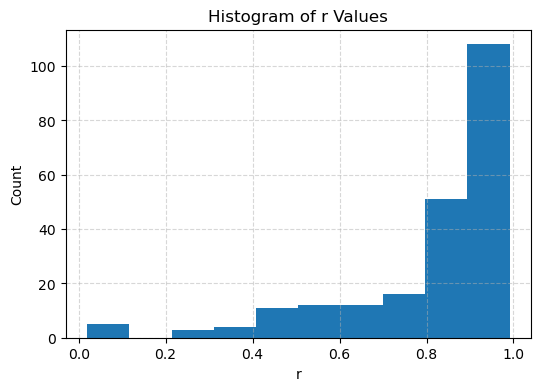

In [28]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(np.sqrt(df_data['r2']), bins=10)       # choose bins as needed
plt.xlabel('r')
plt.ylabel('Count')
plt.title('Histogram of r Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

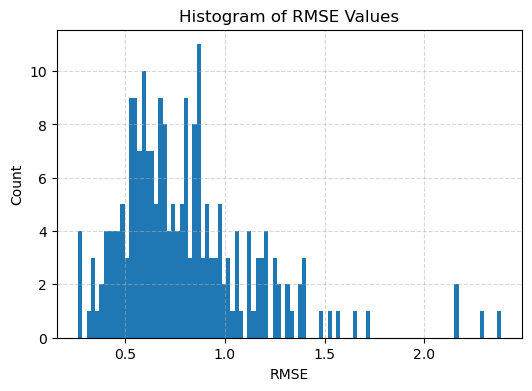

In [29]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['rmse'], bins=100)       # choose bins as needed
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('Histogram of RMSE Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

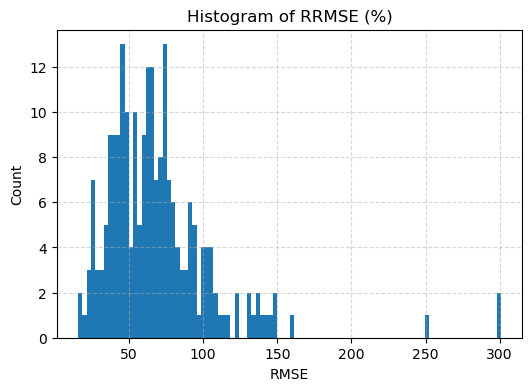

In [30]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['rmse']*100/df_data['EC average'], bins=100)       # choose bins as needed
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('Histogram of RRMSE (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

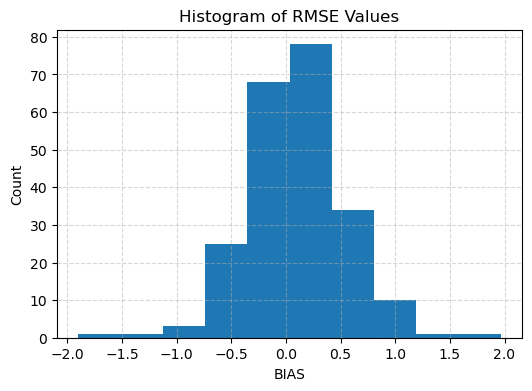

In [31]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['bias'], bins=10)       # choose bins as needed
plt.xlabel('BIAS')
plt.ylabel('Count')
plt.title('Histogram of RMSE Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

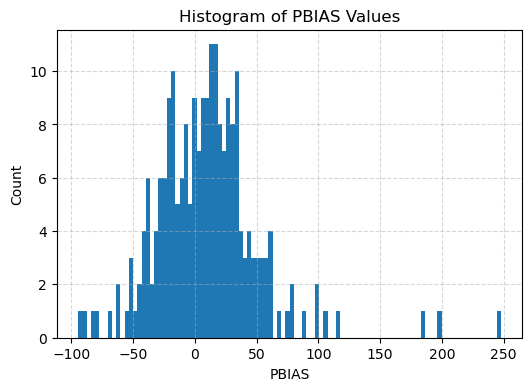

In [32]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['bias']*100/df_data['EC average'], bins=100)       # choose bins as needed
plt.xlabel('PBIAS')
plt.ylabel('Count')
plt.title('Histogram of PBIAS Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# KDE

The vertical axis on a KDE plot is a probability density, not a probability. Densities can exceed 1 so long as the area under the curve integrates to 1.

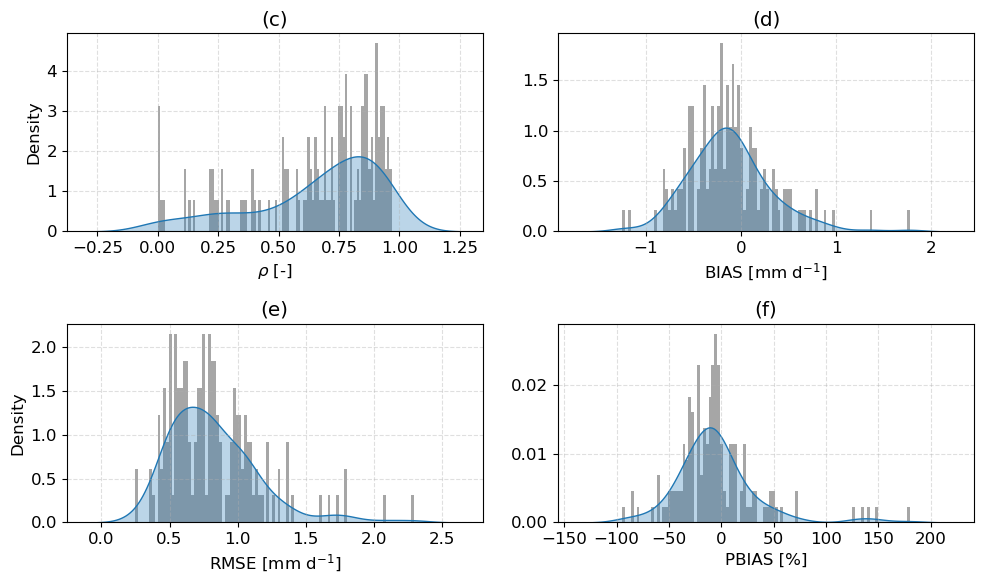

In [59]:
# df_data['pbias'] = df_data['bias'] * 100 / df_data['EC average']
# df_data['r'] = np.sqrt(df_data['r2'])
metrics = ['r', 'bias', 'rmse', 'pbias']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()  # flatten to 1D array

for ax, metric in zip(axes, metrics):
    # plot histogram with 100 bins and light alpha
    ax.hist(df_data[metric], bins=100, color='gray', alpha=0.7, density=True)
    
    # plot KDE on top
    sns.kdeplot(
        data=df_data[metric],
        bw_adjust=1,
        fill=True,
        alpha=0.3,
        ax=ax
    )
    if metric == 'r':
        ax.set_title(r'(c)')
        ax.set_xlabel(r'$\rho$ [-]')
    elif metric == 'bias':
        ax.set_title(r'(d)')
        ax.set_xlabel('BIAS [mm d$^{-1}$]')
        ax.set_ylabel('')
    elif metric == 'rmse':
        ax.set_title(r'(e)')
        ax.set_xlabel(r'RMSE [mm d$^{-1}$]')
    elif metric == 'pbias':
        ax.set_title(r'(f)')       
        ax.set_xlabel('PBIAS [%]')
        ax.set_ylabel('')
    ax.grid(linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig(r'Figure/E-4cdef.png',bbox_inches = 'tight')
plt.show()


In [60]:
df_data[['r','bias','pbias','rmse']].mean()

r        0.660064
bias    -0.123769
pbias   -5.090586
rmse     0.821100
dtype: float64

# check stations

In [36]:
df_data[df_data['r'].isna()] #number of sites without results

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,nse,bias,rmse,pbias,IGBP,Climate,r


In [37]:
df_data[(df_data['r2']<0.4)&df_data['IGBP'].isin(['DBF','DNF','ENF','EBF','MF'])] 

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,nse,bias,rmse,pbias,IGBP,Climate,r
48,US-Me6,126,0.760727,0.692538,0.817063,0.789751,0.266123,0.130646,0.056336,0.733429,7.405602,ENF,Csb,0.515871
132,AU-Boy,180,0.994827,0.376891,1.448056,0.721001,0.066670,-0.400663,0.453229,0.850928,45.558599,EBF,Csa,0.258206
134,AU-Cum,180,1.938424,0.708519,1.938472,0.886646,0.355154,0.313883,0.000048,0.732385,0.002479,EBF,Cfa,0.595948
148,NL-Loo,36,1.757287,0.711856,1.326389,1.275062,0.126824,-0.031516,-0.430898,1.276886,-24.520638,ENF,Cfb,0.356123
177,DE-RuW,108,1.777334,0.791070,1.329861,1.323403,0.279675,0.159531,-0.447473,1.207627,-25.176635,ENF,Cfb,0.528843
195,FR-FBn,108,1.388601,0.620344,1.600000,1.001214,0.098166,-0.040637,0.211399,1.016615,15.223865,ENF,Cfb,0.313315
202,GF-Guy,108,2.664793,0.434176,3.526389,0.457094,0.214330,-3.608959,0.861596,0.976758,32.332570,EBF,Cfa,0.462958
205,IL-Yat,108,0.802453,0.464470,1.740741,0.603423,0.008761,-2.888825,0.938288,1.184434,116.927384,ENF,Cfb,0.093601
208,IT-Cp2,108,1.161019,0.699736,2.300231,1.298730,0.396672,-0.388241,1.139213,1.523110,98.121840,EBF,Cfa,0.629819


In [38]:
df_data[(df_data['r2']>0.6)&(df_data['r2']<0.8)&df_data['IGBP'].isin(['DBF','DNF','ENF','EBF','MF'])] 

,Site,N,EC average,EC std,v3L1 average,v3L1 std,r2,nse,bias,rmse,pbias,IGBP,Climate,r
9,US-Bar,144,0.927723,0.994384,1.503993,1.734090,0.776471,0.570558,0.576270,1.132429,62.116637,DBF,Dfb,0.881176
29,US-GLE,100,1.554456,0.680463,1.209500,1.358451,0.639510,0.485105,-0.344956,0.969886,-22.191442,ENF,Dfc,0.799694
33,US-HB3,108,1.627218,0.918094,2.466204,1.316215,0.767450,0.325477,0.838986,1.075983,51.559514,ENF,Cfa,0.876042
47,US-Me2,108,1.147962,0.932817,1.809028,1.793721,0.688507,0.455488,0.661066,1.317464,57.586008,ENF,Dsb,0.829763
56,US-NC3,108,3.418974,2.118390,2.449074,1.731754,0.781267,0.349487,-0.969900,1.390254,-28.368154,ENF,Cfa,0.883893
80,US-Syv,144,1.352492,1.225397,1.346528,1.671131,0.781751,0.758970,-0.005964,0.817585,-0.440995,MF,Dfb,0.884167
89,US-Vcm,144,1.220260,0.812218,0.950521,1.058402,0.759888,0.683601,-0.269739,0.593273,-22.105066,ENF,Dfb,0.871716
98,US-xBN,108,0.656549,0.692241,0.898148,1.335530,0.732534,0.585559,0.241599,0.855786,36.798319,ENF,Dfc,0.855882
103,US-xDJ,108,0.751954,0.675208,0.685648,0.931831,0.781218,0.750743,-0.066306,0.463064,-8.817799,ENF,Dwc,0.883865
109,US-xJE,144,2.265687,1.080671,2.690972,1.498086,0.765624,0.660867,0.425285,0.869379,18.770676,ENF,Cfa,0.874999
